In [1]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier  #분류
# from sklearn.neighbors import KNeighborsRegressor  #예측
from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn.preprocessing import PolynomialFeatures  #다항특성을 만들어주는 라이브러리

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= '10'  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
#위에 데이터를 가지고 로지스틱 회귀로 모델을 구현하시오.
#nan,0,데이터 간격
#str에 대한 데이터 분리
#결과값 파악: class
#hist그래프 출력
#각각 피쳐간 상관관계 corr.heatmap



In [3]:
wine.info()
#null값없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [6]:
wine['class'].value_counts()
wine['class'].unique()
#1:레드와인 0:화이트와인


array([0., 1.])

In [7]:
w_target=wine['class']
w_target

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64

In [8]:
data=wine[['alcohol', 'sugar', 'pH']].to_numpy()
target=wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    data,target,random_state=42
)

In [10]:
train_input

array([[ 9.9 ,  1.8 ,  3.46],
       [10.8 ,  2.1 ,  3.17],
       [10.2 ,  2.1 ,  3.4 ],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [11]:
#표준화 작업
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [44]:
#데이터 실습- 분류라 로지스틱
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))

0.7859195402298851


In [13]:
###경사하강법 머신러닝 훈련
from sklearn.linear_model import SGDClassifier

In [14]:
sc=SGDClassifier(loss='log_loss',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)


In [15]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc.fit(train_scaled,train_target)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

In [17]:
#결정트리 모델
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

#순수노드 나올때까지 훈련
#과대적합 - 85% 대면 높은 정답률 가짐.

0.9973316912972086
0.8516923076923076


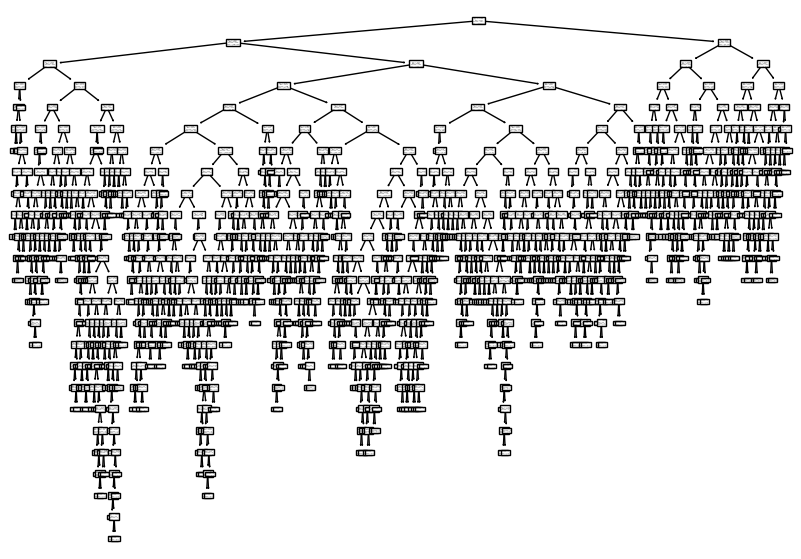

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [33]:
#가지치기를 해서 depth로/ 과대 적합 문제를 해결(격차를 줄임) 
#3,4,5,6,,,10 가장 효율이 좋은 모델을 적용
dt=DecisionTreeClassifier(max_depth=7,random_state=42)
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8916256157635468
0.8523076923076923


In [ ]:
#min_impurity_decrease 최소불순도 조정해서 속도개선,효율도 올릴수있도록 모델을 조정
#부모의 불순도- 자식의 불순도 크기 큰 쪽을 선택, 차이가 0.005도 안나면 그 노드에서 결정
#과대적합 해결 - max_depth, min_impurity_decrease
dt=DecisionTreeClassifier(min_impurity_decrease=0.001,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

In [34]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [47]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=wine.columns)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2000x1500 with 0 Axes>

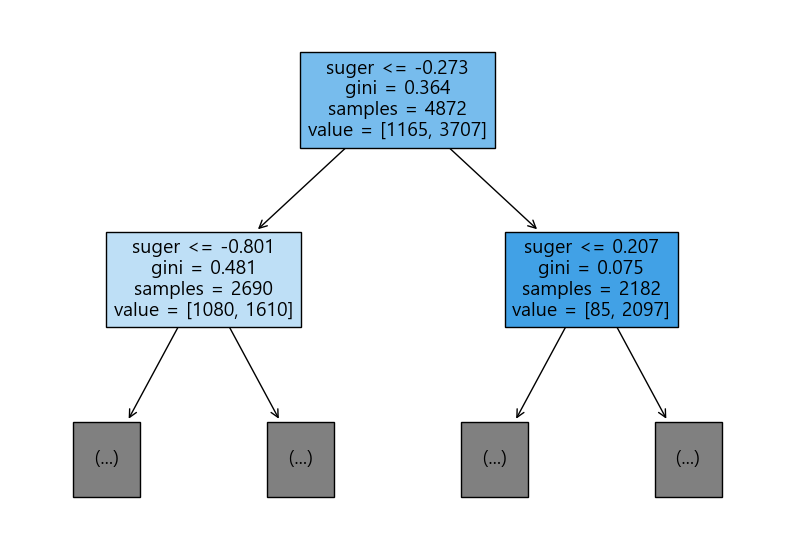

In [19]:
plt.figure(figsize=(10,7))
#max_depth: 가지의 깊이 조정
#filled: 색상조정, 찐한 파란색-양성 클래스,1 주황색-음성클래스,0
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','suger','pH'])
plt.show()

#gini=불순도  부모지니-자식지니;값이 큰 노드를 선택 

In [43]:
wine['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

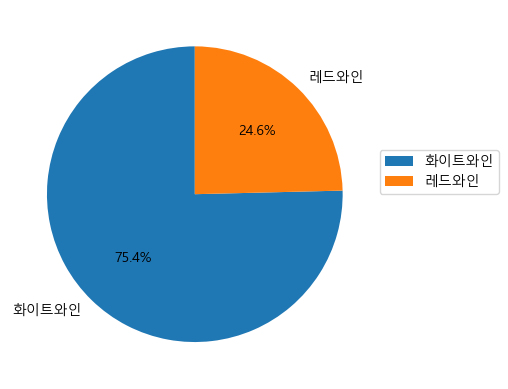

In [42]:
labels=['화이트와인','레드와인']
plt.pie(wine['class'].value_counts(),labels=labels, 
        autopct='%0.1f%%',startangle=90)
plt.legend(loc=(1,0.5))
plt.show()